<a href="https://colab.research.google.com/github/SarthakUniyal/DiabeticPrediction/blob/main/diabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# **Data Collection**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')

In [ ]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
# Statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# Count of null values
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# **Data Visualization**

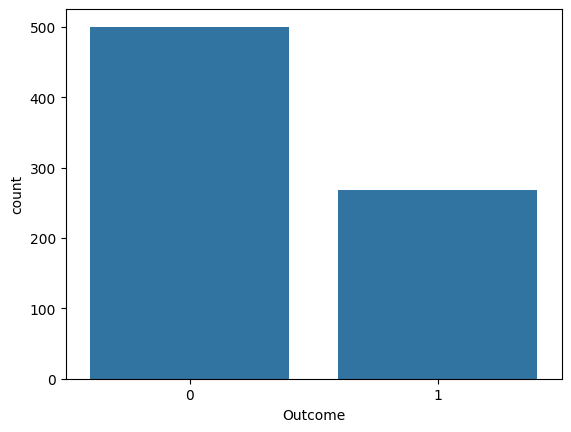

In [ ]:
# Outcome count
sns.countplot(x='Outcome', data = data)
plt.show()

**Observing the outliers**

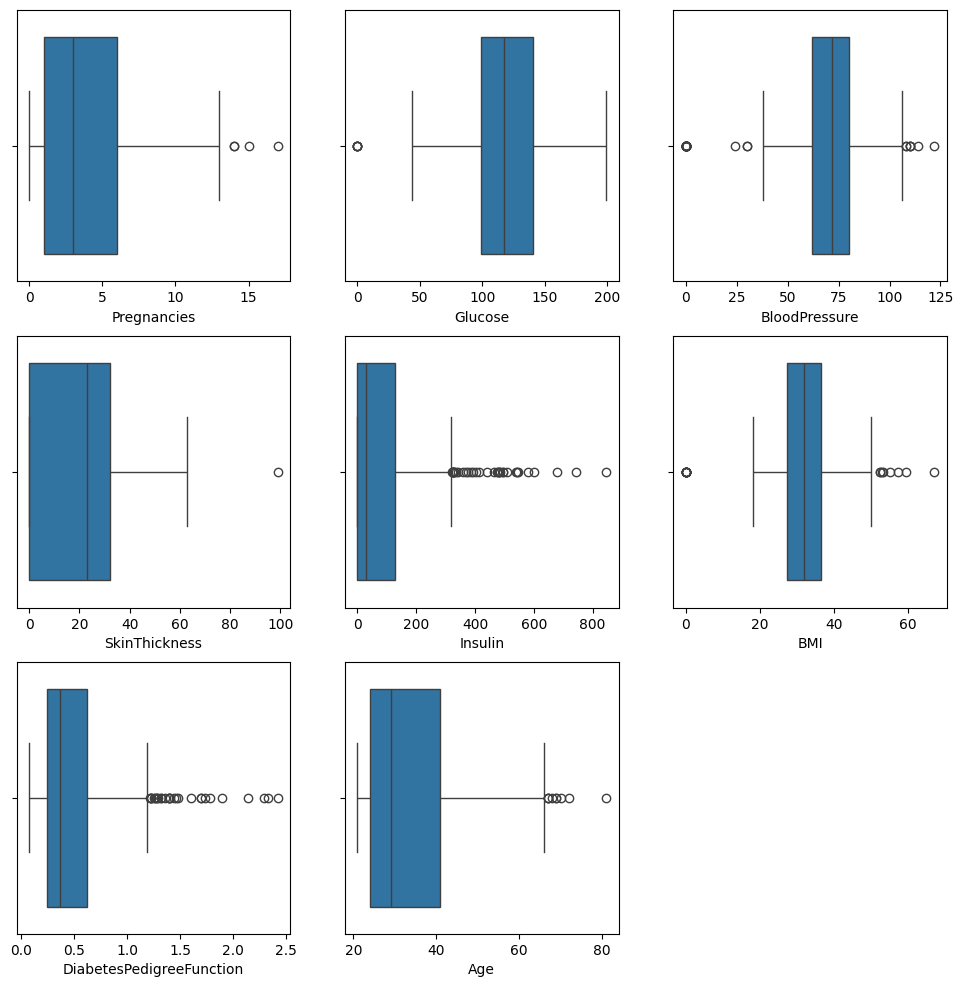

In [ ]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
  plt.subplot(3,3, i+1)
  sns.boxplot(x = col, data = data)
plt.show()

# **Feature Scaling**

In [4]:
sc = StandardScaler()

X = data.drop('Outcome', axis=1)
y = data['Outcome']

print(X.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


# **Split the train and test data**

In [5]:
# Splitting X and Y
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [6]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (537, 8)
X_test shape: (231, 8)
Y_train shape: (537,)
Y_test shape: (231,)


# **Data Modeling**

In [14]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', max_iter=200)
lr.fit(X_train, y_train)

Y_pred_lr = lr.predict(X_test)

In [15]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

Y_pred_knn = knn.predict(X_test)

In [16]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, y_train)

Y_pred_svc = svc.predict(X_test)

In [17]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, y_train)

Y_pred_dt = dt.predict(X_test)

In [18]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
rf.fit(X_train, y_train)

Y_pred_rf = rf.predict(X_test)

# **Model Evaluation**

In [19]:
# Evaluating using accuracy_score metric
accuracy_lr = accuracy_score(y_test, Y_pred_lr)
accuracy_knn = accuracy_score(y_test, Y_pred_knn)
accuracy_svc = accuracy_score(y_test, Y_pred_svc)
accuracy_dt = accuracy_score(y_test, Y_pred_dt)
accuracy_rf = accuracy_score(y_test, Y_pred_rf )

In [20]:
# Accuracy on test data
from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy: " + str(accuracy_lr * 100))
print("K Nearest neighbors Accuracy: " + str(accuracy_knn * 100))
print("Support Vector Classifier Accuracy: " + str(accuracy_svc * 100))
print("Decision tree Accuracy: " + str(accuracy_dt * 100))
print("Random Forest Accuracy: " + str(accuracy_rf * 100))

Logistic Regression Accuracy: 78.35497835497836
K Nearest neighbors Accuracy: 71.86147186147186
Support Vector Classifier Accuracy: 78.35497835497836
Decision tree Accuracy: 73.16017316017316
Random Forest Accuracy: 76.62337662337663
